In [1]:
# Install Sympy to get the expressions at the final model
! pip install sympy

In [2]:
# Imports
import statsmodels.datasets as datasets
import sklearn.metrics as metrics
import numpy
import matplotlib.pyplot as plt
from numpy import log
from pyearth import Earth as earth
from sklearn.ensemble import RandomForestRegressor
from pyearth import Earth
from pyearth import export

%matplotlib inline 

In [3]:
# Let's get Boston dataset to deal with some continuous problem
boston = datasets.get_rdataset("Boston", "MASS").data

In [4]:
# Some visualization of the dataset
boston[0:5]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# Grab the INDEPENDENT variables to put inside the model
x = boston.iloc[:, 0:boston.shape[1] - 1]

In [6]:
# Some data to play 
x[0:5]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [7]:
# Get all columns of dataset
xlabel = list(x.columns)
xlabel

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

In [8]:
# Get only the DEPENDENT variable
y = boston.iloc[:, boston.shape[1] - 1]
y[:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [9]:
# Put some parameters to model
model = earth(allow_linear=None
            ,allow_missing=False
            ,check_every=None
            ,enable_pruning=True
            ,endspan=None
            ,endspan_alpha=0.05
            ,fast_K=None
            ,fast_h=None
            ,feature_importance_type=None
            ,max_degree=None
            ,max_terms=None
            ,min_search_points=None
            ,minspan=None
            ,minspan_alpha=0.05
            ,penalty=3
            ,smooth=None
            ,thresh=None
            ,use_fast=None
            ,verbose=0
            ,zero_tol=None)

In [10]:
# Fit the model
model.fit(x, log(y), xlabels = xlabel)

Earth(allow_linear=None, allow_missing=False, check_every=None,
   enable_pruning=True, endspan=None, endspan_alpha=0.05, fast_K=None,
   fast_h=None, feature_importance_type=None, max_degree=None,
   max_terms=None, min_search_points=None, minspan=None,
   minspan_alpha=0.05, penalty=3, smooth=None, thresh=None, use_fast=None,
   verbose=0, zero_tol=None)

In [11]:
# GRab some data from the model
print model.summary()

Earth Model
---------------------------------------
Basis Function   Pruned  Coefficient   
---------------------------------------
(Intercept)      No      1.92889       
h(lstat-5.68)    No      0.0291543     
h(5.68-lstat)    Yes     None          
h(rm-6.383)      No      0.27093       
h(6.383-rm)      Yes     None          
h(crim-24.8017)  No      -0.0274698    
h(24.8017-crim)  No      0.0406624     
h(dis-1.5106)    No      -0.0353598    
h(1.5106-dis)    No      1.41847       
ptratio          No      -0.0292831    
nox              No      -0.586277     
rad              No      0.0203696     
tax              No      -0.000525082  
h(black-179.36)  No      -0.000554406  
h(179.36-black)  No      -0.00144926   
h(lstat-30.59)   Yes     None          
h(30.59-lstat)   No      0.0564323     
h(rm-7.82)       No      -0.313019     
h(7.82-rm)       Yes     None          
indus            Yes     None          
h(tax-666)       Yes     None          
h(666-tax)       Yes     Non

In [12]:
# Some metrics about the model (R**2)
r2 = metrics.r2_score(log(y), model.predict(x))
mean_absolute_error = metrics.mean_absolute_error(log(y), model.predict(x))
mean_squared_error = metrics.mean_squared_error(log(y), model.predict(x))

print 'R**2: ', r2
print 'Mean Absolute Error: ', mean_absolute_error
print 'Mean Squared Error: ', mean_squared_error
print 'Root Mean Squared Error', numpy.sqrt(mean_squared_error) #Fix it

R**2:  0.855759400541
Mean Absolute Error:  0.11375424877
Mean Squared Error:  0.0240524027952
Root Mean Squared Error 0.155088370922


In [13]:
#See the traces of the model
print(model.trace())

Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.166752  1      0.167  0.000  0.000  
1     0       12   183   0.052668  3      0.054  0.684  0.678  
2     0       5    56    0.044880  5      0.047  0.731  0.720  
3     0       0    403   0.036296  7      0.039  0.782  0.769  
4     0       7    367   0.031285  9      0.034  0.812  0.797  
5     0       10   -1    0.029718  10     0.033  0.822  0.805  
6     0       4    -1    0.028164  11     0.031  0.831  0.813  
7     0       8    -1    0.026881  12     0.030  0.839  0.820  
8     0       9    -1    0.025696  13     0.029  0.846  0.826  
9     0       11   409   0.025057  15     0.029  0.850  0.827  
10    0       12   398   0.024554  17     0.029  0.853  0.826  
11    0       5    280   0.024169  19     0.029  0.855  0.825  
12    0       2    -1    0.

In [14]:
# Summary of the model
print(model.summary())

Earth Model
---------------------------------------
Basis Function   Pruned  Coefficient   
---------------------------------------
(Intercept)      No      1.92889       
h(lstat-5.68)    No      0.0291543     
h(5.68-lstat)    Yes     None          
h(rm-6.383)      No      0.27093       
h(6.383-rm)      Yes     None          
h(crim-24.8017)  No      -0.0274698    
h(24.8017-crim)  No      0.0406624     
h(dis-1.5106)    No      -0.0353598    
h(1.5106-dis)    No      1.41847       
ptratio          No      -0.0292831    
nox              No      -0.586277     
rad              No      0.0203696     
tax              No      -0.000525082  
h(black-179.36)  No      -0.000554406  
h(179.36-black)  No      -0.00144926   
h(lstat-30.59)   Yes     None          
h(30.59-lstat)   No      0.0564323     
h(rm-7.82)       No      -0.313019     
h(7.82-rm)       Yes     None          
indus            Yes     None          
h(tax-666)       Yes     None          
h(666-tax)       Yes     Non

In [15]:
# See predictions
y_hat = model.predict(x)
y_hat

array([ 3.32406087,  3.13255523,  3.52929814,  3.51118389,  3.41392939,
        3.22957942,  3.07854321,  2.87843681,  2.58270934,  2.91628264,
        2.82812743,  3.03016581,  2.99555127,  3.00339681,  2.96655025,
        3.00586111,  3.0449344 ,  2.84379035,  2.99483962,  2.95262371,
        2.6734715 ,  2.86942517,  2.71939587,  2.69480206,  2.79149452,
        2.83055139,  2.83501332,  2.80326325,  2.91798155,  2.99141717,
        2.62899892,  2.87354113,  2.55846911,  2.76061944,  2.74979543,
        3.14594336,  3.10749957,  3.14982392,  3.11386322,  3.3606862 ,
        3.60873003,  3.37901793,  3.22377793,  3.17244031,  3.11918581,
        3.11697805,  3.00881418,  2.86178772,  2.53690228,  2.91670651,
        3.02469226,  3.1370755 ,  3.29457934,  3.16246715,  2.72436909,
        3.47488032,  3.07717649,  3.48242662,  3.13594507,  3.10141706,
        2.98296052,  2.97069099,  3.1784547 ,  3.1591606 ,  3.24080506,
        3.29740904,  3.11570181,  3.08525679,  2.94559994,  3.06

In [16]:
# Now to see the variable importances we'll list first a set of metrics 
criteria = ('rss', 'gcv', 'nb_subsets')

In [17]:
# Put some parameters inside the model
# Second model considering variable importances

model2 = Earth(max_degree=3
              ,max_terms=10
              ,minspan_alpha=.5
              ,feature_importance_type=criteria #This is the variable that made de selections about variable importances
              ,verbose=True)

In [18]:
# Fit the model
model2.fit(x, log(y), xlabels = xlabel)

Beginning forward pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.166752  1      0.167  0.000  0.000  
1     0       12   89    0.052664  3      0.054  0.684  0.678  
2     0       5    84    0.044882  5      0.047  0.731  0.720  
3     1       0    474   0.036055  7      0.038  0.784  0.770  
4     0       7    379   0.031645  9      0.034  0.810  0.794  
5     4       12   423   0.028962  11     0.032  0.826  0.808  
---------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms
Beginning pruning pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   11     0.03  0.032  0.826  0.808  
1     10  10     0.03  0.032  0.826  0.810  
2     4   9      0.03  0.032  0.826

Earth(allow_linear=None, allow_missing=False, check_every=None,
   enable_pruning=True, endspan=None, endspan_alpha=None, fast_K=None,
   fast_h=None, feature_importance_type=('rss', 'gcv', 'nb_subsets'),
   max_degree=3, max_terms=10, min_search_points=None, minspan=None,
   minspan_alpha=0.5, penalty=None, smooth=None, thresh=None,
   use_fast=None, verbose=True, zero_tol=None)

In [19]:
# We'll use RF estimator to get the variables importantes
rf = RandomForestRegressor()

In [20]:
# Let's fit the model with default paarmeters
rf.fit(x, log(y))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
# Print model trace
print(model2.trace())

Forward Pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     0.166752  1      0.167  0.000  0.000  
1     0       12   89    0.052664  3      0.054  0.684  0.678  
2     0       5    84    0.044882  5      0.047  0.731  0.720  
3     1       0    474   0.036055  7      0.038  0.784  0.770  
4     0       7    379   0.031645  9      0.034  0.810  0.794  
5     4       12   423   0.028962  11     0.032  0.826  0.808  
---------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   11     0.03  0.032  0.826  0.808  
1     10  10     0.03  0.032  0.826  0.810  
2     4   9      0.03  0.032  0.826  0.811  
3     7  

In [22]:
# Print the summary of the model
print(model2.summary())

Earth Model
----------------------------------------------------
Basis Function                Pruned  Coefficient   
----------------------------------------------------
(Intercept)                   No      3.24538       
h(lstat-5.7)                  No      -0.0475761    
h(5.7-lstat)                  No      0.0799476     
h(rm-6.389)                   No      0.276175      
h(6.389-rm)                   Yes     None          
h(crim-8.05579)*h(lstat-5.7)  No      -0.000540323  
h(8.05579-crim)*h(lstat-5.7)  No      0.00245139    
h(dis-1.3861)                 No      -0.0119719    
h(1.3861-dis)                 No      2.06961       
h(lstat-23.29)*h(6.389-rm)    No      0.0264174     
h(23.29-lstat)*h(6.389-rm)    Yes     None          
----------------------------------------------------
MSE: 0.0290, GCV: 0.0316, RSQ: 0.8260, GRSQ: 0.8114


In [23]:
# Let's see the most important variables
print(model2.summary_feature_importances(sort_by='gcv'))

            nb_subsets    gcv    rss
lstat       0.42          0.78   0.78   
rm          0.25          0.12   0.12   
crim        0.17          0.06   0.06   
dis         0.17          0.04   0.04   
black       0.00          0.00   0.00   
ptratio     0.00          0.00   0.00   
tax         0.00          0.00   0.00   
rad         0.00          0.00   0.00   
age         0.00          0.00   0.00   
nox         0.00          0.00   0.00   
chas        0.00          0.00   0.00   
indus       0.00          0.00   0.00   
zn          0.00          0.00   0.00   



In [24]:
importances = model2.feature_importances_
importances['random_forest'] = rf.feature_importances_
random_values = importances['random_forest']
gcv_values = importances['gcv']

In [25]:
# Coeficients of the model
model2.coef_

array([[  3.24537739e+00,  -4.75761009e-02,   7.99475897e-02,
          2.76174514e-01,  -5.40322617e-04,   2.45139029e-03,
         -1.19719092e-02,   2.06961106e+00,   2.64174196e-02]])

In [26]:
inputs = numpy.arange(x.shape[1])
inputs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

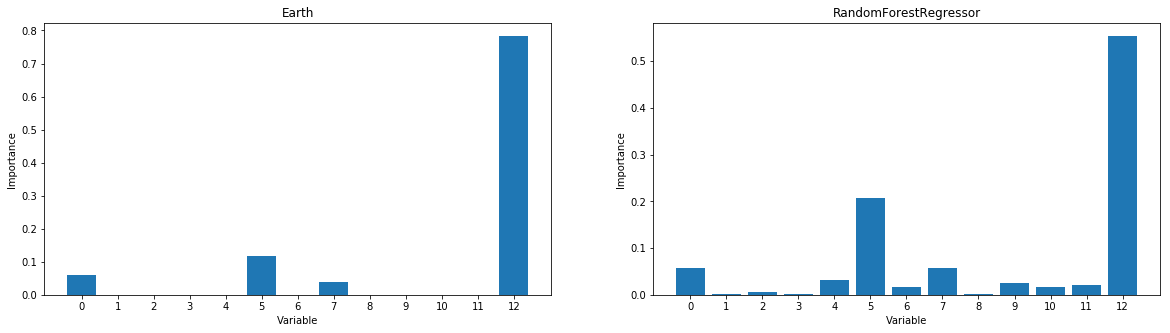

In [27]:
fig = plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(inputs, gcv_values)
plt.title("Earth")
plt.xticks(inputs)
plt.xlabel("Variable")
plt.ylabel("Importance")

plt.subplot(1,2,2)
plt.bar(inputs, random_values)
plt.title("RandomForestRegressor")
plt.xticks(inputs)
plt.xlabel("Variable")
plt.ylabel("Importance")

In [28]:
# List of variables
xlabel

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

In [29]:
# See the EXACT data that needed to put inside the model
x[1:2]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14


In [30]:
# Return sympy expression 
print('Resulting sympy expression:')
print(export.export_sympy(model))

Resulting sympy expression:
-0.586276615586754*nox - 0.0292830837707757*ptratio + 0.0203696402408519*rad - 0.000525081689794919*tax - 0.00144925907154959*Max(0, -black + 179.36) - 0.00055440571664812*Max(0, black - 179.36) + 0.0406624012969403*Max(0, -crim + 24.8017) - 0.0274698195965718*Max(0, crim - 24.8017) + 0.0218641874217271*Max(0, crim - 9.96654) + 1.41847368743171*Max(0, -dis + 1.5106) - 0.0353597811251357*Max(0, dis - 1.5106) + 0.0564322709192822*Max(0, -lstat + 30.59) + 0.0291543402681494*Max(0, lstat - 5.68) - 0.313018656956002*Max(0, rm - 7.82) + 0.270930341227841*Max(0, rm - 6.383) + 1.92888707548532
